# 多种概率分布

## 随机变量（random variable）

随机变量是随机试验各种结果的实值单值函数，是对一次试验结果的量化。

随机事件不论与数量是否直接有关，都可以数量化，即都能用数量化的方式表达。随机事件数量化的好处是可以用数学分析的方法来研究随机现象。

随机变量是一个变量，它取值于一组可能的值（离散或连续的），并服从某种随机性。随机变量的每个可能取值的都与一个概率相关联。

In probability and statistics, a random variable, random quantity, aleatory variable, or stochastic variable is a variable whose possible values are outcomes of a random phenomenon.[1] More specifically, a random variable is defined as a function that maps the outcomes of an unpredictable process to numerical quantities, typically real numbers. It is a variable (specifically a dependent variable), in the sense that it depends on the outcome of an underlying process providing the input to this function, and it is random in the sense that the underlying process is assumed to be random.

## 概率分布（probability distributrion）

随机变量的所有可能取值和与之相关联的概率就被称为概率分布。

In probability theory and statistics, a probability distribution is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment. In more technical terms, the probability distribution is a description of a random phenomenon in terms of the probabilities of events. For instance, if the random variable X is used to denote the outcome of a coin toss ("the experiment"), then the probability distribution of X would take the value 0.5 for X = heads, and 0.5 for X = tails (assuming the coin is fair). Examples of random phenomena can include the results of an experiment or survey.

概率分布有两种类型：

- 离散（discrete）概率分布
- 连续（continuous）概率分布。

## 离散概率分布

也称为概率质量函数（probability mass function）。

离散概率分布的例子有：

- 伯努利分布（Bernoulli distribution）
- 二项分布（binomial distribution）
- 泊松分布（Poisson distribution）
- 几何分布（geometric distribution）等。

### 二项分布（Binomial Distribution）

服从二项分布的随机变量X，表示在n个独立的“是/非”试验中“是”的次数，其中每次试验的为“是"的概率为p。

$P(X=K) = (\frac{n!}{k!(n-k)!})p^k(1-p)^{n-k}$

期望：$E(X) = np$  
方差：$Var(X) = np(1-p)$



二项分布(n=10,p=0.5)的概率分布函数
[0.00097656 0.00976563 0.04394531 0.1171875  0.20507813 0.24609375
 0.20507813 0.1171875  0.04394531 0.00976563 0.00097656]


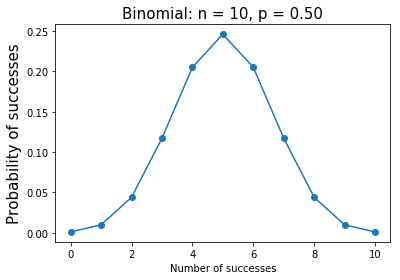

In [5]:
from scipy import stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 查看二项分布的描述
# stats.binom?

#二项分布的例子：抛掷10次硬币，恰好两次正面朝上的概率是多少？
n = 10 # 试验总次数
p = 0.5 # 正面朝上的概率
k = np.arange(0,11) #所有可能结果,0表示0次正面朝上，以此类推...
# 显示概率质量函数
binomal = stats.binom.pmf(k,n,p)
print("二项分布(n=10,p=0.5)的概率分布函数")
print(binomal)

plt.plot(k,binomal,'o-')
plt.title('Binomial: n = %i, p = %.2f' % (n,p),fontsize = 15)
plt.xlabel('Number of successes')
plt.ylabel('Probability of successes', fontsize = 15)
plt.show()

可以使用.rvs函数模拟一个二项随机变量，其中参数size指定你要进行模拟的次数。让Python返回10000个参数为n和p的二项式随机变量。输出这些随机变量的平均值和标准差，然后画出所有的随机变量的直方图。

Mean: 4.9856
SD : 1.56084 


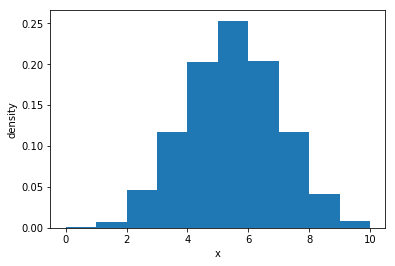

In [14]:
from scipy import stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

binomal_sim = stats.binom.rvs(n = 10,p=0.5,size = 10000)

print("Mean: %g" % np.mean(binomal_sim))
print("SD : %g " % np.std(binomal_sim, ddof = 1))
plt.hist(binomal_sim,bins = 10,density = True)
plt.xlabel("x")
plt.ylabel("density")
plt.show()

### 泊松分布（Poisson Distribution）

一个服从泊松分布的随机变量X，表示在具有比率参数（rate parameter）λ的一段固定时间间隔内，事件发生的次数。

参数λ告诉你该事件发生的概率。

随机变量X的分布律：

$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$

期望：λ  
方差：λ

泊松分布的例子：已知某路口发生事故的比率是每天2次，那么在此处一天内发生4次事故的概率是多少？

让我们考虑这个平均每天发生2起事故的例子。泊松分布的实现和二项分布有些类似，在泊松分布中我们需要指定比率参数。泊松分布的输出是一个数列，包含了发生0次、1次、2次，直到10次事故的概率。我用结果生成了以下图片。

λ=2 的泊松分布律:
[1.35335283e-01 2.70670566e-01 2.70670566e-01 1.80447044e-01
 9.02235222e-02 3.60894089e-02 1.20298030e-02 3.43708656e-03
 8.59271640e-04 1.90949253e-04]


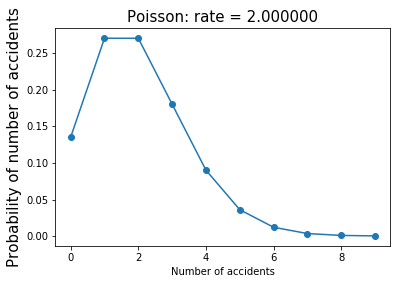

In [13]:
from scipy import stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

rate = 2
n = np.arange(0,10)
poisson = stats.poisson.pmf(n,rate)
print("λ=2 的泊松分布律:")
print(poisson)

plt.plot(n,poisson,'o-')
plt.title('Poisson: rate = %f' % rate,fontsize = 15)
plt.xlabel('Number of accidents')
plt.ylabel('Probability of number of accidents', fontsize = 15)
plt.show()

可以看到，事故次数的峰值在均值附近。平均来说，可以预计事件发生的次数为λ。尝试不同的λ和n的值，然后看看分布的形状是怎么变化的。

现在来模拟1000个服从泊松分布的随机变量。

Mean: 2.0086
SD : 1.40994 


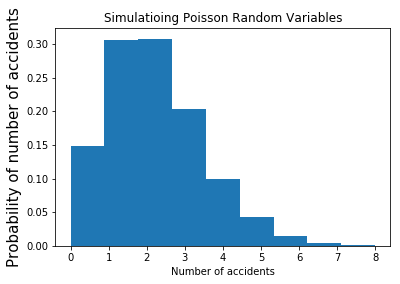

In [17]:
from scipy import stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

poisson_sim = stats.poisson.rvs(mu = 2,loc = 0,size = 10000)

print("Mean: %g" % np.mean(poisson_sim))
print("SD : %g " % np.std(poisson_sim, ddof = 1))
plt.figure()
plt.hist(poisson_sim,bins = 9,density = True)
plt.title('Simulatioing Poisson Random Variables')
plt.xlabel('Number of accidents')
plt.ylabel('Probability of number of accidents', fontsize = 15)
plt.show()

## 连续概率分布

也称为概率密度函数（probability density function），它们是具有连续取值（例如一条实线上的值）的函数。

连续概率分布的例子有：

- 正态分布（normal distribution）
- 指数分布（exponential distribution）
- β分布（beta distribution）


### 正态分布/高斯分布


正态分布是一种连续分布，其函数可以在实线上的任何地方取值。正态分布由两个参数描述：分布的平均值μ和方差σ2 。
https://www.cnblogs.com/wt869054461/p/5936038.html
https://blog.csdn.net/ccnt_2012/article/details/81114920
https://test-matterhorn.dce.harvard.edu/engage/ui/index.html#/2014/01/14328


正态分布（Normal distribution），也称“常态分布”，又名高斯分布（Gaussian distribution），最早由A.棣莫弗在求二项分布的渐近公式中得到。C.F.高斯在研究测量误差时从另一个角度导出了它。P.S.拉普拉斯和高斯研究了它的性质。是一个在数学、物理及工程等领域都非常重要的概率分布，在统计学的许多方面有着重大的影响力。

自然界和人类社会中，很多现象可以看作正态分布，例如：

- 人的身高、体重（或其他生理尺寸）
- 医学检查指标（血小板数、红细胞数）
- 测量误差


![正态分布](images/bayes/正态分布.jpg)

正太分布的定义：

若X的概率密度函数为：

$f(x) = \frac{1}{\sqrt{2 \pi} \delta}e^{-\frac{(x-\mu)^2}{2\delta^2}},-\infty < x < +\infty$

其中，$-\infty < \mu < \infty, \mu > 0 $，就称X服从参数为$\mu,\delta$的正态分布（或高斯分布）。

记为$X \sim N(\mu,\delta^2)$

特征：
- f(x)关于$ x = \mu$对称
- 当$x \leq \mu$时，f(x)是严格单调递增函数
- $f_{max} = f(\mu) = \frac{1}{\sqrt{2 \pi}\delta}$
- $lim_{|x-\mu| \to \infty}f(x) = 0$

#### 正态分布的概率计算

若$X \sim N(\mu,\delta^2)$，对实数x,

$P(X \leq x) = F(x) $